## Ramon Brand - Session 4 - Cifar 10 with Convolution
### Overview
The idea of this exercise is to train a neural network using the Cifar-10 dataset. We will use the AlexNet network structure.

### Part 1 - Our baseline model
First we create a nice clean model without convolution and analyze it.

In [1]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D

# -- Load images, pre-shuffled
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 7500

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

print("Training shape:   ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

# -- Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(80, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val,y_val))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])




Using TensorFlow backend.


Training shape:    (42500, 32, 32, 3)
Validation shape:  (7500, 32, 32, 3)
Test shape:        (10000, 32, 32, 3)
Test result shape: (10000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)         0        

42500/42500 [==============================] - 12s 287us/step - loss: 1.4181 - acc: 0.5238 - val_loss: 2.3566 - val_acc: 0.2976
Epoch 47/50
42500/42500 [==============================] - 12s 290us/step - loss: 1.2546 - acc: 0.5582 - val_loss: 6.2572 - val_acc: 0.1456
Epoch 48/50
42500/42500 [==============================] - 12s 290us/step - loss: 1.3674 - acc: 0.5393 - val_loss: 1.7592 - val_acc: 0.3949
Epoch 49/50
42500/42500 [==============================] - 12s 291us/step - loss: 1.2262 - acc: 0.5656 - val_loss: 2.0627 - val_acc: 0.3501
Epoch 50/50
10000/10000 [==============================] - 2s 192us/step
Loss:  2.4981133361816408
Accuracy:  0.3143


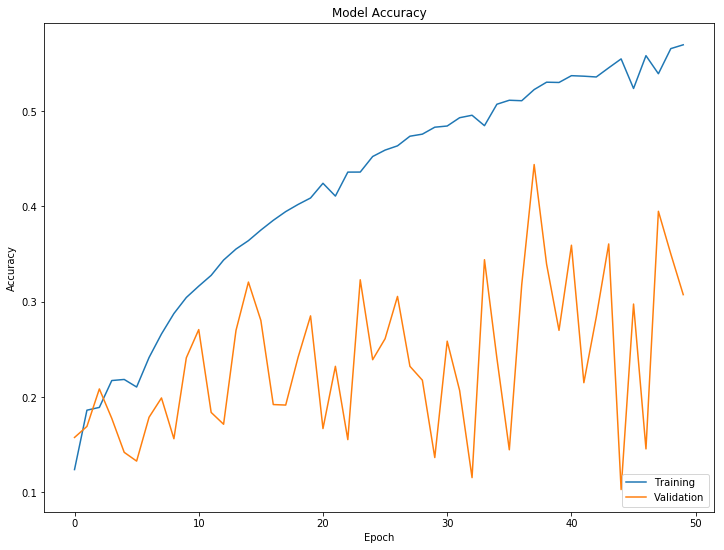

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

This is truly shocking... The training took quite a long time, around 20 minutes, and the results are really terrible. With a final test accuracy of 0.31, on 10 categories, its just barely a statistically strong model. The model is clearly overfitting, however the validation data is very noisy.

I am also not sure why it took so long to train, since the parameter count is under a million and I have trained networks with much higher parameter counts before.

I will try to add the dropout layers as defined in the AlexNet structure, which should help the overfitting.



In [8]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D

# -- Load images, pre-shuffled
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# -- Subset
subsetSizeTrain = 5000
x_train = x_train[:subsetSizeTrain]
y_train = y_train[:subsetSizeTrain]

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 500

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

print("Training shape:   ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

# -- Create model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(96, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist2 = model.fit(x_train, y_train, epochs=300, batch_size=512, validation_data=(x_val,y_val))

score2 = model.evaluate(x_test, y_test)
print("Loss: ", score2[0])
print("Accuracy: ", score2[1])




Training shape:    (4500, 32, 32, 3)
Validation shape:  (500, 32, 32, 3)
Test shape:        (10000, 32, 32, 3)
Test result shape: (10000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 96)          55392     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 96)          0         


4500/4500 [==============================] - 0s 108us/step - loss: 2.2553 - acc: 0.1533 - val_loss: 2.2321 - val_acc: 0.1660
Epoch 46/300
4500/4500 [==============================] - 0s 109us/step - loss: 2.2543 - acc: 0.1464 - val_loss: 2.2324 - val_acc: 0.1720
Epoch 47/300
4500/4500 [==============================] - 0s 110us/step - loss: 2.2532 - acc: 0.1478 - val_loss: 2.2288 - val_acc: 0.1740
Epoch 48/300
4500/4500 [==============================] - 0s 108us/step - loss: 2.2467 - acc: 0.1491 - val_loss: 2.2224 - val_acc: 0.1680
Epoch 49/300
4500/4500 [==============================] - 0s 108us/step - loss: 2.2479 - acc: 0.1480 - val_loss: 2.2206 - val_acc: 0.1740
Epoch 50/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.2425 - acc: 0.1542 - val_loss: 2.2145 - val_acc: 0.1720
Epoch 51/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.2405 - acc: 0.1536 - val_loss: 2.2122 - val_acc: 0.1700
Epoch 52/300
4500/4500 [=======================

4500/4500 [==============================] - 0s 107us/step - loss: 2.1347 - acc: 0.2013 - val_loss: 2.0640 - val_acc: 0.2240
Epoch 105/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.1445 - acc: 0.1949 - val_loss: 2.1282 - val_acc: 0.2180
Epoch 106/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.1262 - acc: 0.2051 - val_loss: 2.0834 - val_acc: 0.2420
Epoch 107/300
4500/4500 [==============================] - 0s 108us/step - loss: 2.1296 - acc: 0.2038 - val_loss: 2.0577 - val_acc: 0.2260
Epoch 108/300
4500/4500 [==============================] - 1s 112us/step - loss: 2.1386 - acc: 0.1991 - val_loss: 2.0613 - val_acc: 0.2500
Epoch 109/300
4500/4500 [==============================] - 0s 108us/step - loss: 2.1349 - acc: 0.1933 - val_loss: 2.1231 - val_acc: 0.2220
Epoch 110/300
4500/4500 [==============================] - 0s 109us/step - loss: 2.1417 - acc: 0.1967 - val_loss: 2.0539 - val_acc: 0.2300
Epoch 111/300
4500/4500 [================

4500/4500 [==============================] - 0s 107us/step - loss: 2.0370 - acc: 0.2471 - val_loss: 2.0159 - val_acc: 0.2760
Epoch 164/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.0479 - acc: 0.2313 - val_loss: 1.9539 - val_acc: 0.3180
Epoch 165/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.0244 - acc: 0.2464 - val_loss: 1.9481 - val_acc: 0.2940
Epoch 166/300
4500/4500 [==============================] - 0s 107us/step - loss: 2.0294 - acc: 0.2409 - val_loss: 1.9431 - val_acc: 0.3180
Epoch 167/300
4500/4500 [==============================] - 0s 110us/step - loss: 2.0404 - acc: 0.2522 - val_loss: 1.9461 - val_acc: 0.3180
Epoch 168/300
4500/4500 [==============================] - 0s 109us/step - loss: 2.0311 - acc: 0.2464 - val_loss: 1.9802 - val_acc: 0.3040
Epoch 169/300
4500/4500 [==============================] - 0s 110us/step - loss: 2.0420 - acc: 0.2367 - val_loss: 1.9470 - val_acc: 0.3120
Epoch 170/300
4500/4500 [================

4500/4500 [==============================] - 0s 108us/step - loss: 1.9504 - acc: 0.2764 - val_loss: 1.8786 - val_acc: 0.3220
Epoch 223/300
4500/4500 [==============================] - 0s 108us/step - loss: 1.9492 - acc: 0.2809 - val_loss: 1.8390 - val_acc: 0.3500
Epoch 224/300
4500/4500 [==============================] - 0s 111us/step - loss: 1.9631 - acc: 0.2751 - val_loss: 1.9392 - val_acc: 0.3080
Epoch 225/300
4500/4500 [==============================] - 0s 108us/step - loss: 1.9243 - acc: 0.2864 - val_loss: 1.8500 - val_acc: 0.3340
Epoch 226/300
4500/4500 [==============================] - 0s 107us/step - loss: 1.9322 - acc: 0.2840 - val_loss: 1.8485 - val_acc: 0.3360
Epoch 227/300
4500/4500 [==============================] - 0s 107us/step - loss: 1.9207 - acc: 0.2933 - val_loss: 1.8266 - val_acc: 0.3400
Epoch 228/300
4500/4500 [==============================] - 0s 108us/step - loss: 1.9422 - acc: 0.2778 - val_loss: 1.9443 - val_acc: 0.2960
Epoch 229/300
4500/4500 [================

4500/4500 [==============================] - 1s 111us/step - loss: 1.8367 - acc: 0.3251 - val_loss: 1.7384 - val_acc: 0.3880
Epoch 282/300
4500/4500 [==============================] - 0s 109us/step - loss: 1.8548 - acc: 0.3169 - val_loss: 1.7446 - val_acc: 0.3780
Epoch 283/300
4500/4500 [==============================] - 0s 108us/step - loss: 1.8343 - acc: 0.3280 - val_loss: 1.8385 - val_acc: 0.3380
Epoch 284/300
4500/4500 [==============================] - 0s 108us/step - loss: 1.8575 - acc: 0.3187 - val_loss: 1.7549 - val_acc: 0.3780
Epoch 285/300
4500/4500 [==============================] - 0s 108us/step - loss: 1.8423 - acc: 0.3280 - val_loss: 1.7697 - val_acc: 0.3680
Epoch 286/300
4500/4500 [==============================] - 0s 109us/step - loss: 1.8559 - acc: 0.3176 - val_loss: 1.7552 - val_acc: 0.3800
Epoch 287/300
4500/4500 [==============================] - 0s 109us/step - loss: 1.8406 - acc: 0.3313 - val_loss: 1.7299 - val_acc: 0.3780
Epoch 288/300
4500/4500 [================

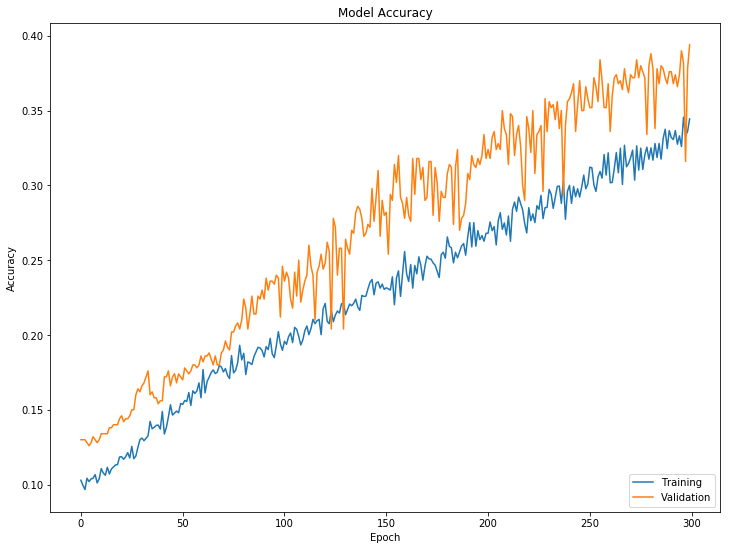

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist2.history["acc"])
plt.plot(hist2.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

I tried to use a smaller subset of the data, just to get some more epochs done, to see if a trend can be seen.

I am really surprised, because it is clear that this model is not overfitting, infact the validation accuracy is better than the training accuracy essentially everywhere, and whats more, is the gap seems to be growing...

This does confirm that if I let the full set of run for long enough, I should get better accuracy than the first attempt, however, the accuracy attained in the subset model is still only 0.37, which isnt great. The achievement here is rather the knowledge that the dropout layers seem to be controlling the overfitting well.

In [10]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D

# -- Load images, pre-shuffled
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 5000

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

print("Training shape:   ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

# -- Create model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(96, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist3 = model.fit(x_train, y_train, epochs=150, batch_size=256, validation_data=(x_val,y_val))

score3 = model.evaluate(x_test, y_test)
print("Loss: ", score3[0])
print("Accuracy: ", score3[1])


Training shape:    (45000, 32, 32, 3)
Validation shape:  (5000, 32, 32, 3)
Test shape:        (10000, 32, 32, 3)
Test result shape: (10000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 9, 9, 96)          55392     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 96)          0        

45000/45000 [==============================] - 6s 123us/step - loss: 1.5054 - acc: 0.4570 - val_loss: 1.3843 - val_acc: 0.5148
Epoch 45/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.5065 - acc: 0.4574 - val_loss: 1.3841 - val_acc: 0.5060
Epoch 46/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.4882 - acc: 0.4639 - val_loss: 1.3573 - val_acc: 0.5228
Epoch 47/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.4810 - acc: 0.4660 - val_loss: 1.3767 - val_acc: 0.5120
Epoch 48/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.4705 - acc: 0.4701 - val_loss: 1.3358 - val_acc: 0.5274
Epoch 49/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.4634 - acc: 0.4760 - val_loss: 1.3314 - val_acc: 0.5276
Epoch 50/150
45000/45000 [==============================] - 6s 124us/step - loss: 1.4534 - acc: 0.4795 - val_loss: 1.3240 - val_acc: 0.5310
Epoch 51/150
45000/45000 [=======

45000/45000 [==============================] - 6s 122us/step - loss: 1.1320 - acc: 0.6063 - val_loss: 1.0556 - val_acc: 0.6414
Epoch 103/150
45000/45000 [==============================] - 6s 122us/step - loss: 1.1190 - acc: 0.6132 - val_loss: 1.0497 - val_acc: 0.6398
Epoch 104/150
45000/45000 [==============================] - 5s 122us/step - loss: 1.1116 - acc: 0.6144 - val_loss: 1.0769 - val_acc: 0.6258
Epoch 105/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.1088 - acc: 0.6141 - val_loss: 1.0419 - val_acc: 0.6446
Epoch 106/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.1119 - acc: 0.6154 - val_loss: 1.0419 - val_acc: 0.6484
Epoch 107/150
45000/45000 [==============================] - 5s 122us/step - loss: 1.0996 - acc: 0.6171 - val_loss: 1.0783 - val_acc: 0.6254
Epoch 108/150
45000/45000 [==============================] - 6s 123us/step - loss: 1.0950 - acc: 0.6208 - val_loss: 1.0401 - val_acc: 0.6488
Epoch 109/150
45000/45000 [

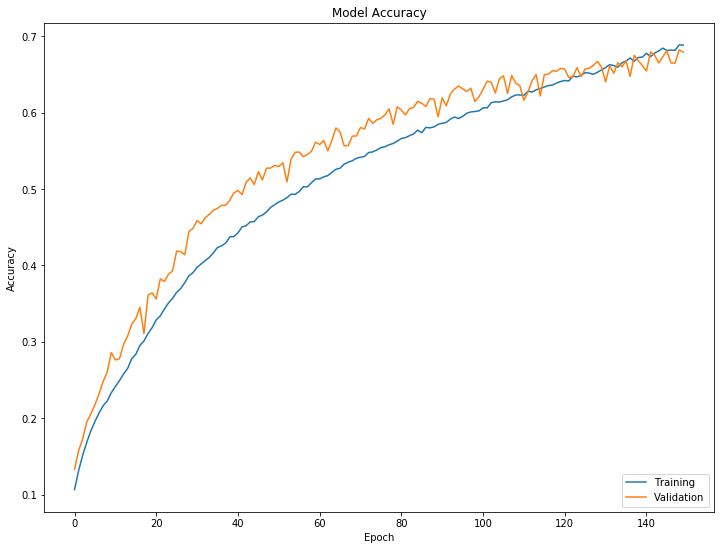

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist3.history["acc"])
plt.plot(hist3.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

This is really nice. The model seems to just about reach capacity when the training was concluded. The dropout layers have done a really impressive job at minimizing the overfitting.

I think it might be better to generally use convolution in such a way, where the pooling is quite aggressive, such that the x, y resolution drops significantly, and the depth increases. It seems as though it is much faster and more efficient to work with high depth data than it is to work with high resolution data.

My thinking of the convolution is such that, instead of many points of data, we get larger chunks of grouped, catagorized data.

A final accuracy of 0.65. Not too terrible, considering the first attempt was a mere 0.3.

I also think this model can still be improved if run for more epochs, since the overfitting is still not excessive, and the trajectory still seems to be upwards.